In [2]:
install.packages("pacman")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
pacman::p_load(plotly,dplyr,tibble,scales)

I was working on a visualization to help me view my company's income statement more efficiently and intuitively.

The visualization was done for APPLE.inc, a company we are familiar with, and the income statement for the visualization was taken from the SEC's annual report. I moved the data from the annual report to Excel and imported the Excel file into R as "sdata".

There is some personal information in this process, which I will not disclose here, but I will disclose the elements of sdata as follows.

I have already exported the annual report of the Apple.inc(AAPL) from the sec.gov and imported it in personal R environment. The financial data is shown below.

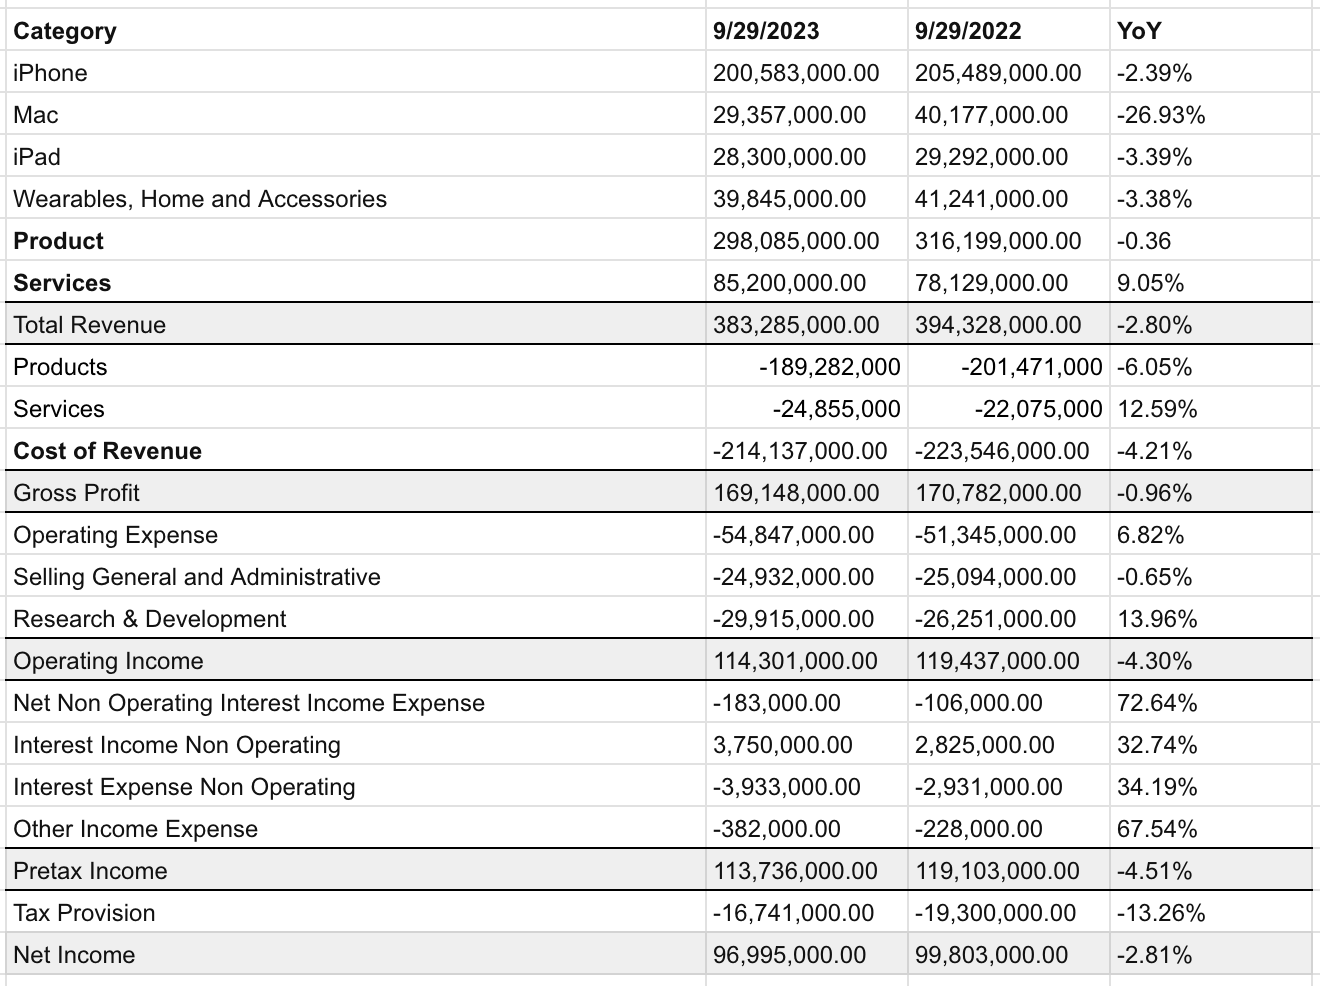

Here's what you need to visualize financial data
- Label: The element of each piece of financial data.
- ID: The number of the Label. It usually starts from 0.
- Value : The value of the label.

I personally assigned the color to #fc636b if the value is - and #4A8685 if the value is +.

I used the dplyr package to preprocess the data.
In the code, sdata is the above data.

date is the column name of sdata, 9/29/2023, replaced with 2023 Q3. We set it later for the title of the plot.

In [ ]:
date = colnames(sdata)[2] %>%
  as.Date(., format = "%m/%d/%Y") %>%
  as.yearqtr()

data = sdata %>%
  select(1:4) %>%
  mutate(YoY = paste0(round(YoY,digits = 4)*100,"%"),
         ID = 0:(nrow(sdata)-1),
         Value1 = sdata[[2]],
         Value = abs(Value1),
         color = if_else(Value1 > 0,"#4A8685","#fc636b")) %>%
  rename(Label = Category) %>%
  select(ID,Label,Value,YoY,color)

data is set as follows

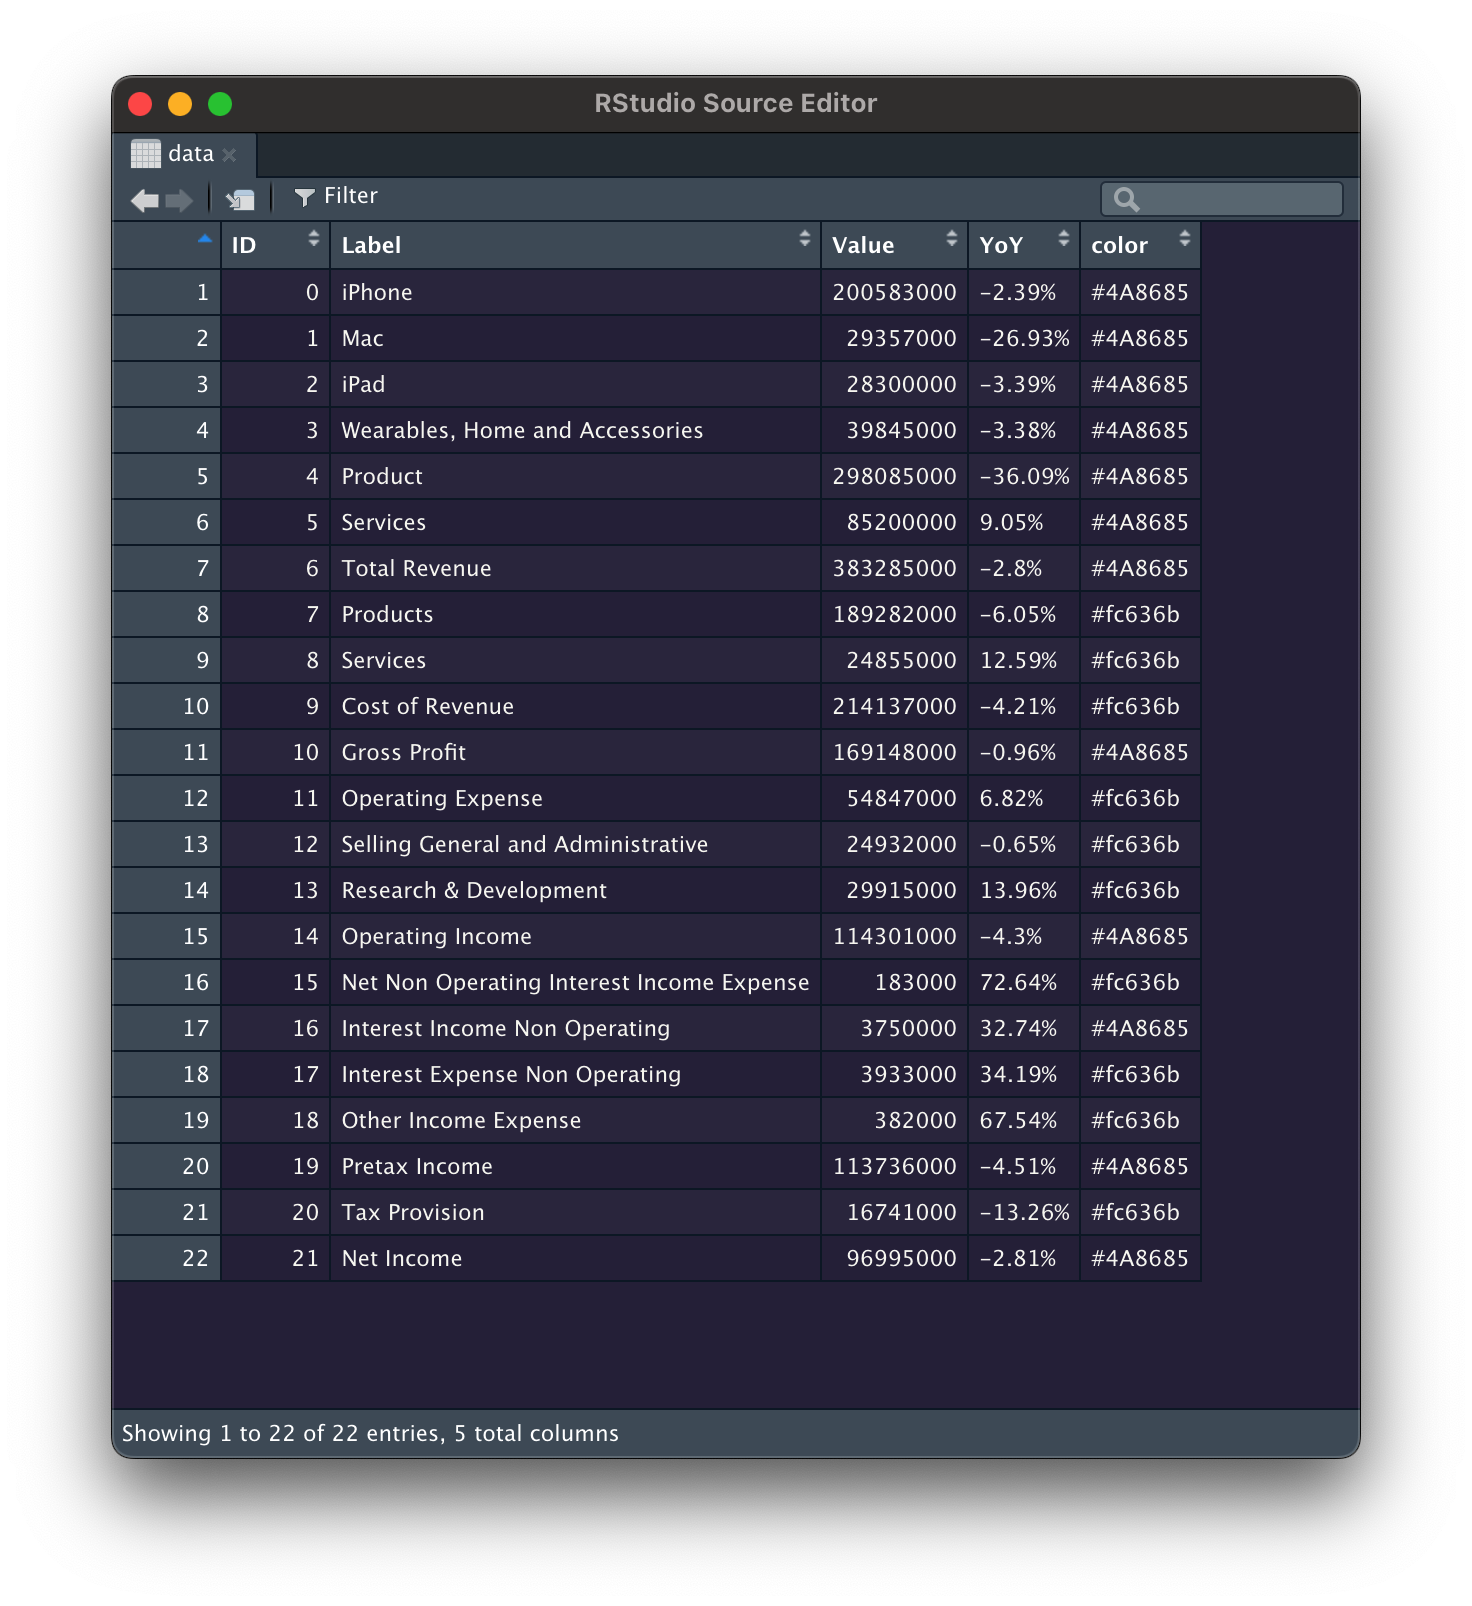

Now we're going to create a dataframe named links that we need for our visualization, which I created using the tibble function.

The data in links is organized as follows
- source: the element from which the data originates
- target: the element that receives the data sent from source.
- value: The value of source and target.

For example, when calculating financial data, we can subtract several values from Total Revenue to get gross profit. In this case, Total Revenue becomes the source and gross profit becomes the target. In this case, value is the value of gross profit.

In [ ]:
links = tribble(
  ~source, ~target, ~value,
  0,4,data$Value[1],
  1,4,data$Value[2],
  2,4,data$Value[3],
  3,4,data$Value[4],
  4,6,data$Value[5],
  5,6,data$Value[6],
  9,7,data$Value[8],
  9,8,data$Value[9],
  6,9,data$Value[10],
  6,10,data$Value[11],
  10,11,data$Value[12],
  11,12,data$Value[13],
  11,13,data$Value[14],
  10,14,data$Value[15],
  14,18,data$Value[19],
  14,15,data$Value[16],
  15,16,data$Value[17],
  15,17,data$Value[18],
  14,19,data$Value[20],
  19,20,data$Value[21],
  19,21,data$Value[22]
)

The plotly package supports sankey diagrams; specify ***type = "sankey"*** to get a sankey diagram.

- node represents each element of the sankey diagram. Their thickness and size can be adjusted using pad and thickness.
- LINK represents connecting each NODE.

orientation is used to specify whether the sankey diagram is vertical or horizontal. If you want to use the vertical form, you can specify ***oriental = "v"***. I will specify ***oriental = "h"*** to use horizontal.


In [ ]:
p = plot_ly(
  type = "sankey",
  domain = list(
    x = c(0,1),
    y = c(0,1)
  ),
  orientation = "h",
  node = list(
    label = "<b>" %+% data$Label %+% "</b>" %+% "<br>" %+% label_number_si(accuracy=0.1)(data$Value) %+% "<br>" %+% "(" %+% data$YoY %+% ")",
    color = data$color,
    pad = 40,
    thickness = 15,
    line = list(
      color = "white",
      width = 2
    )
  ),

  link = list(
    source = links$source,
    target = links$target,
    value = links$value
  ),
  configuration = list(
    displayModeBar = TRUE
  )
) %>%
  layout(title = "<br>" %+% "<b>" %+% tc %+% " INCOME STATEMENT" %+% " (" %+% date %+% ")" %+% "</b>",
         font = list(
           family = "Montserrat"))

p

When you run the code, you should see the financial statement as below:

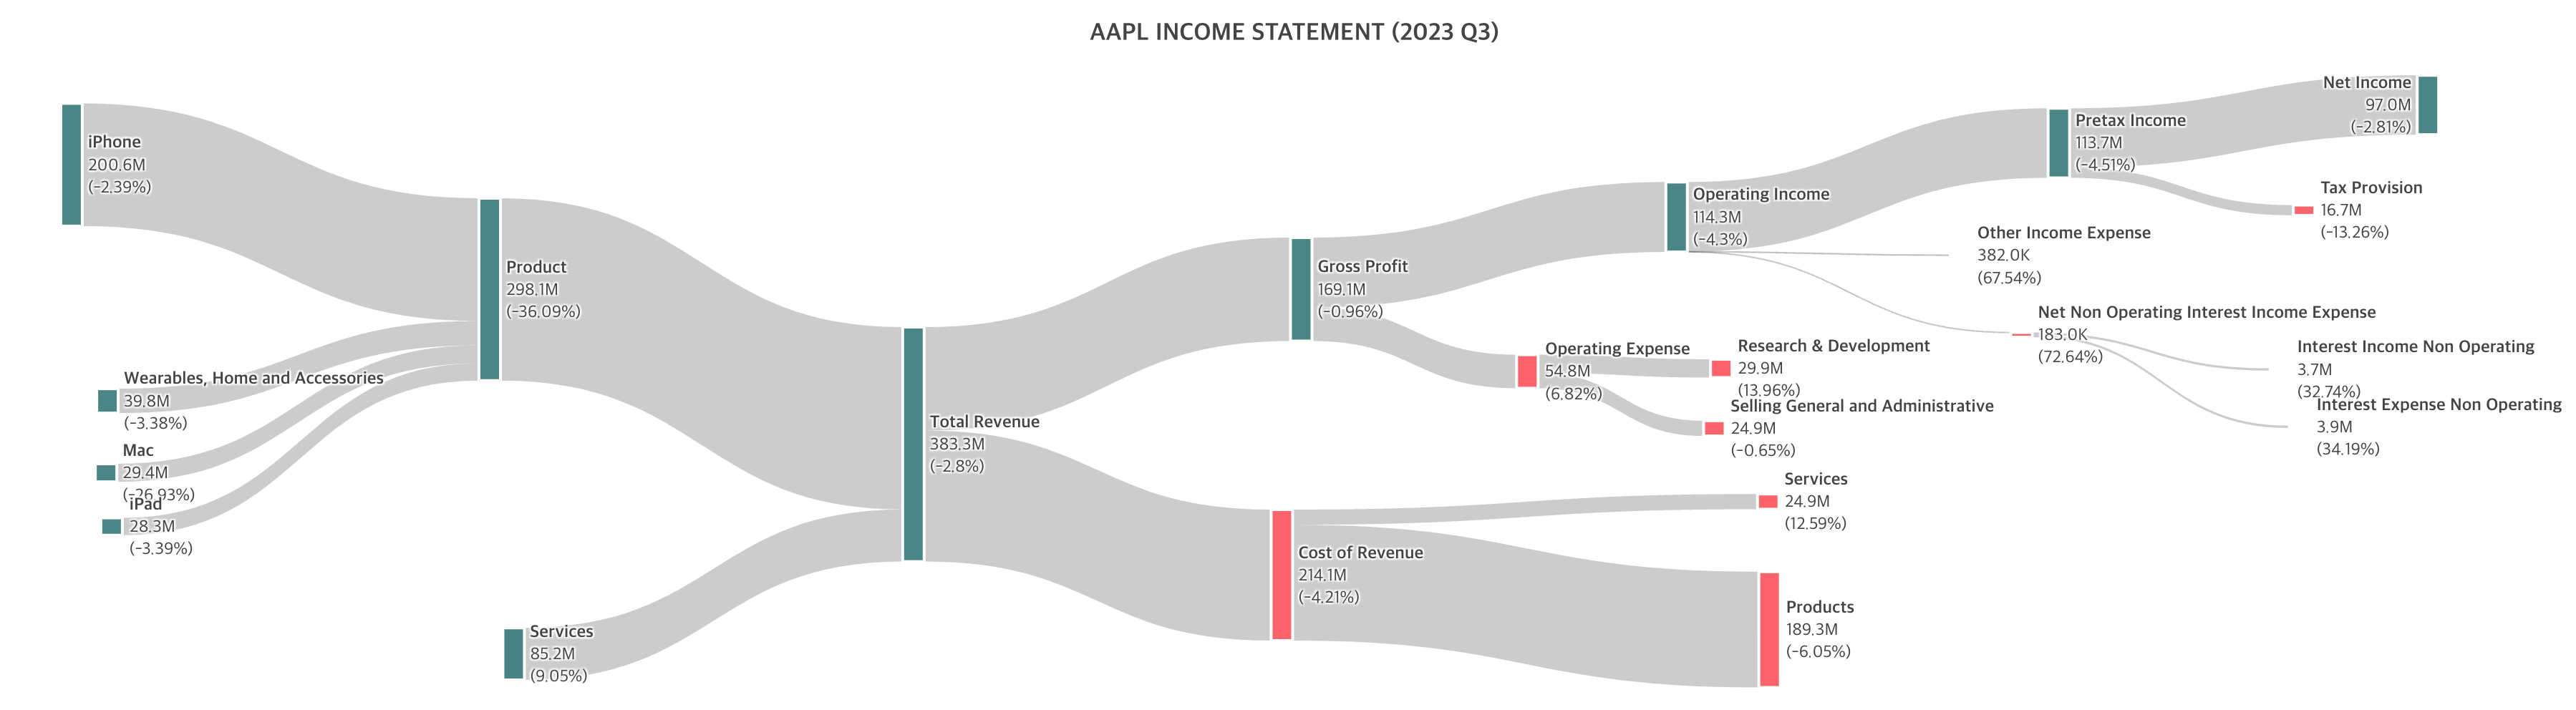